<a href="https://colab.research.google.com/github/Nao9910/k-means/blob/main/k_means%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

先頭列と先頭行がindexの状態のものを読み込む。
（コンマ付きでも可）
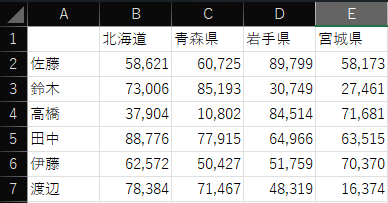

Excelで開いていたCSVの場合、SHIFT-JISを選択する。

クラスター数はclister_numに自然数を入力。

「ランタイム」→「すべてのセルを実行」で、終わったら左のファイルから
- 「class_all.csv」（インポートされたファイルの一番右の列にクラスター番号を付加）
- 「class_list.csv」（クラスター番号のみ出力）
- 「class_average.csv」（各クラスターの平均値を出力）

をダウンロード。

In [ ]:
# すでに同名のファイルが読み込まれている場合は削除
import os
if "file_name" in locals():
  os.remove("/content/"+str(file_name))
  print("file removed")
else:
  pass

# CSV読み込み
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

In [2]:
#@title クラスター数
# クラスター数の設定、直接入力か右に入力
cluster_num = 6 #@param {type:"integer"}

In [7]:
#@title 入力する文字エンコード
input_type = "SHIFT-JIS" #@param ["SHIFT-JIS", "UTF-8"]

In [8]:
#@title 出力する文字エンコード
output_type = "SHIFT-JIS" #@param ["SHIFT-JIS", "UTF-8"]

In [ ]:
# ライブラリのインポート
import pandas as pd
from sklearn.cluster import KMeans

# データの読み込み
df = pd.read_csv( file_name , encoding=input_type, thousands=",", index_col=0)

# KMeans法の実行
clu = KMeans(n_clusters= cluster_num)
df["class"] = clu.fit_predict(df)
df=df.replace({"class": {0: int(cluster_num)}}) #1スタートにする
print(df)

# クラス分け結果の出力 class_all.csv
df.to_csv ( "class_all.csv" , encoding=output_type)

# クラス分け結果のみ出力 class_list.csv
df["class"].to_csv ( "class_list.csv" , encoding=output_type)

# 各グループの平均値 class_average.csv
print("各グループの平均値")
print(df.groupby("class").mean())
a=df.groupby("class").mean()
a.to_csv("class_average.csv",encoding=output_type)

In [ ]:
# 各クラスターのデータ数を表示
for num in range(1,cluster_num+1):
  sum=(df["class"] == num).sum()
  print(f"{num}:{sum}")